In [9]:
import demo_utils
from demo_utils import ModelConfig, AnalysisConfig, ExperimentRunner

import matplotlib.pyplot as plt

from transformers.utils.logging import disable_progress_bar
disable_progress_bar()


In [6]:
model_config = ModelConfig(
        model_name="mistralai/Mistral-7B-v0.1",
        max_length=15
    )
    
analysis_config = AnalysisConfig(
    selected_layers=[0, 6, 13, 20, 27, 32],
    k_neighbors=2,
    barcode_params={"knn": 2, "dim": 3}
)

In [7]:
# Run experiment
runner = ExperimentRunner(model_config, analysis_config)
prompts, last_tokens, month_tokens, generated_texts = runner.run_calendar_analysis()

Disabled automatic differentiation


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated 12 prompts


From v4.47 onwards, when a model cache is to be returned, `generate` will return a `Cache` instance instead by default (as opposed to the legacy tuple of tuples format). If you want to keep returning the legacy format, please set `return_legacy_cache=True`.


Extracted hidden states: torch.Size([33, 12, 4096])


Analyzing month tokens...
Generating simplex tree without labels


100%|██████████| 33/33 [00:03<00:00,  8.29it/s]

[======================================================================] 100%


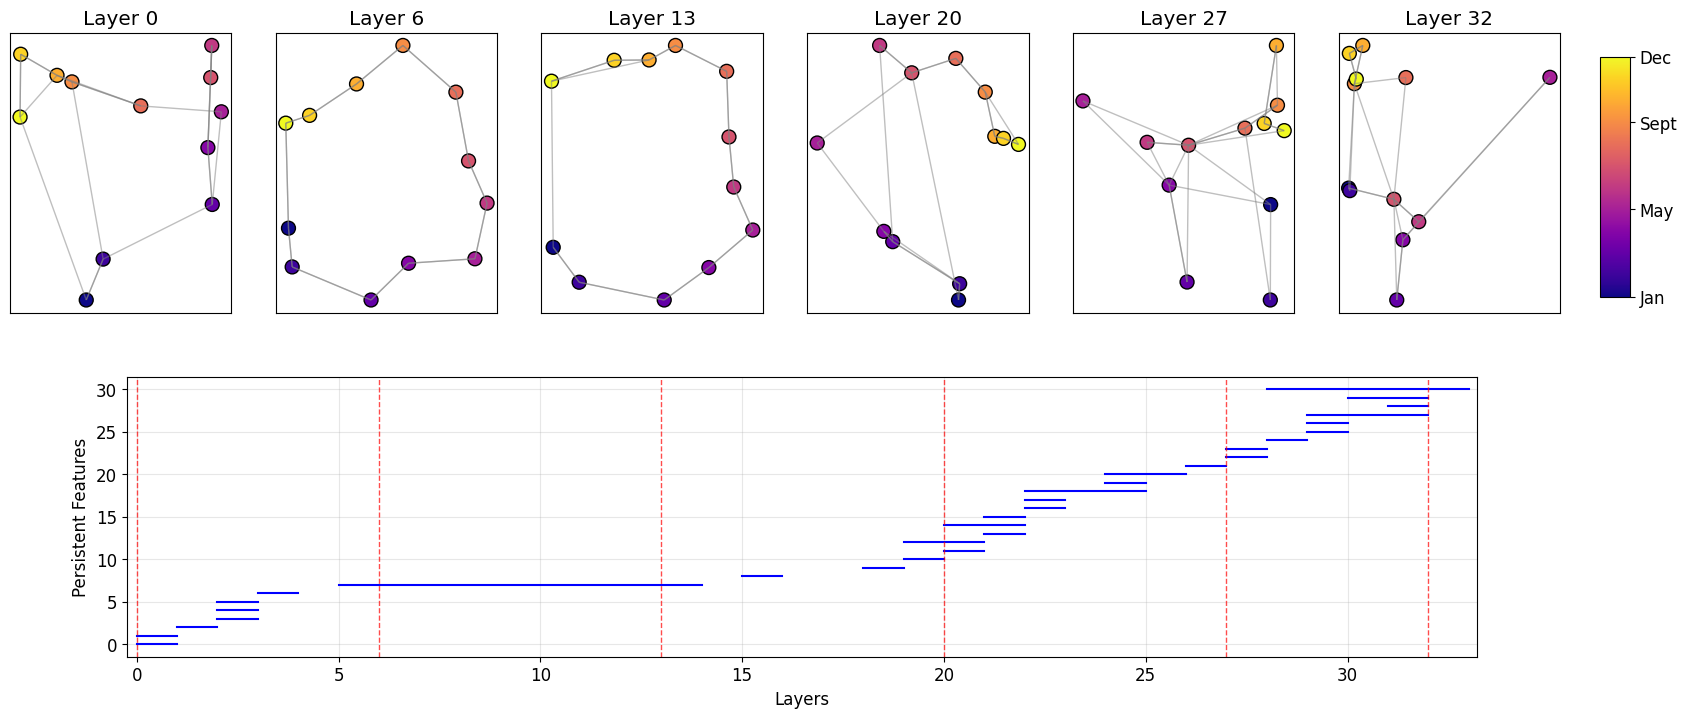

In [13]:
# Analyze month tokens (second-to-last tokens)
print("Analyzing month tokens...")
fig_month = runner.visualize_results(prompts, month_tokens, "Month Token Analysis")
plt.savefig('month_tokens.png', bbox_inches='tight')
plt.show()

Analyzing question tokens...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:789: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


Generating simplex tree without labels


100%|██████████| 33/33 [00:02<00:00, 13.48it/s]

[======================================================================] 100%


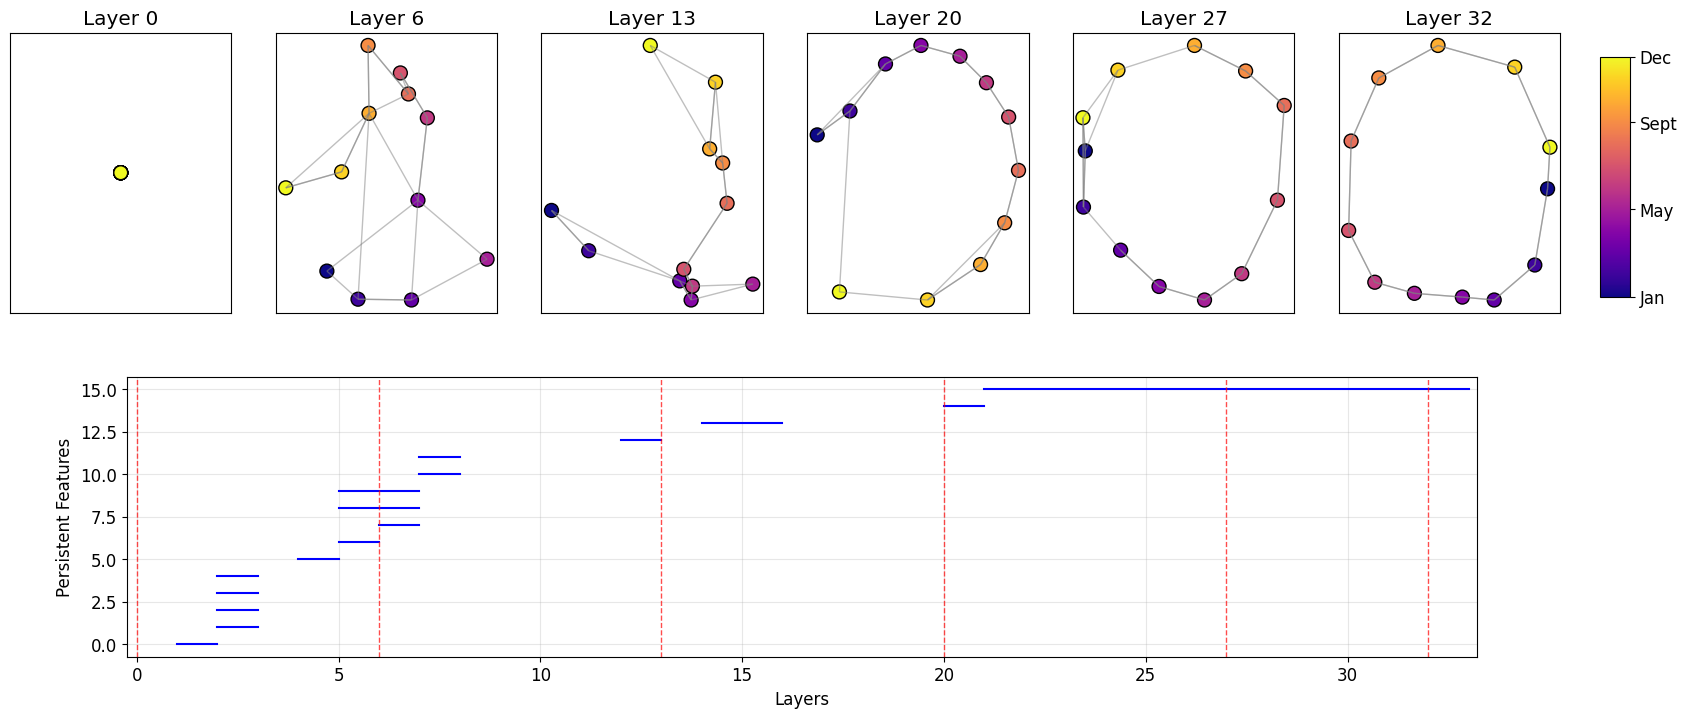

In [12]:
# Analyze last tokens
print("Analyzing question tokens...")
fig_last = runner.visualize_results(prompts, last_tokens, "Last Token Analysis")
plt.savefig(f'question_tokens.png', bbox_inches='tight')
plt.show()